In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

1. Using lemonade.csv dataset and focusing on continuous variables:



In [20]:
df = pd.read_csv('lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5.

b. Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?


In [21]:
columns = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [22]:
def generate_outlier_bounds(df, columns, multiplier=1.5):
    """
    Takes in a dataframe, the column name, and can specify a multiplier (default=1.5). Returns the upper and lower bounds for the
    values in that column that signify outliers.
    """
    # get q1
    q1 = df[columns].quantile(.25)
    # get q3
    q3 = df[columns].quantile(.75)
    # get iqr
    iqr = q3 - q1

    upper = q3 + (multiplier * iqr)
    lower = q1 - (multiplier * iqr)
    
    upper = pd.DataFrame(upper)
    upper.columns = ['Upper_Bound']
    lower = pd.DataFrame(lower)
    lower.columns = ['Lower_Bound']

    bounds = pd.concat([upper, lower], axis=1)
    bounds

    return upper, lower, bounds

In [23]:
upper, lower, bounds= generate_outlier_bounds(df, columns, multiplier=1.5)
#upper = pd.DataFrame(upper)
#upper.columns = ['Upper_Bound']
#lower = pd.DataFrame(lower)
#lower.columns = ['Lower_Bound']

#bounds = pd.concat([upper, lower], axis=1)
bounds

,Upper_Bound,Lower_Bound
Temperature,104.7,16.70
Rainfall,1.3,0.26
Flyers,76.0,4.00
Price,0.5,0.50
Sales,45.0,5.00


Temperature


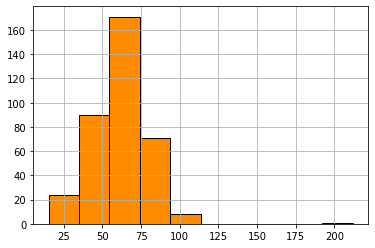

Rainfall


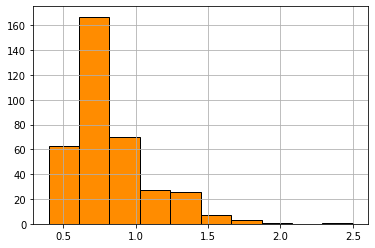

Flyers


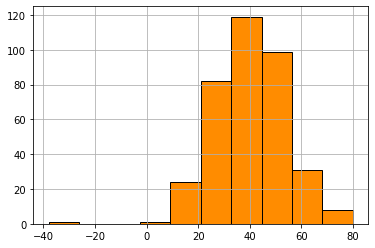

Price


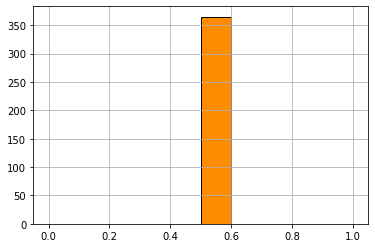

Sales


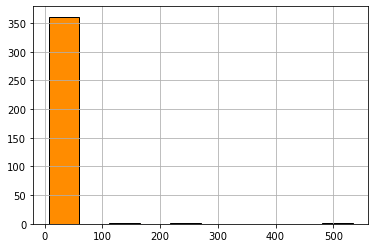

In [24]:
for col in columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist(color='chocolate', edgecolor='black')
        print(col)
        plt.show()

Temperature


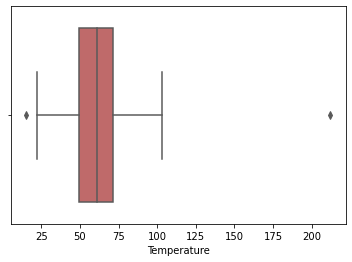

Rainfall


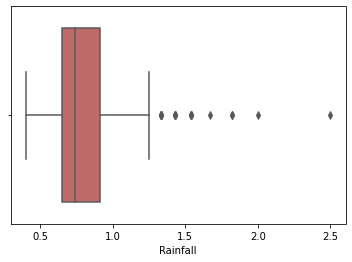

Flyers


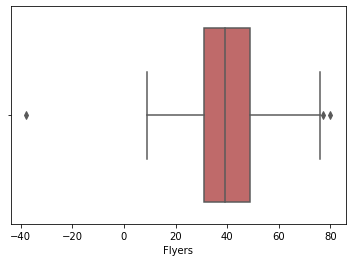

Price


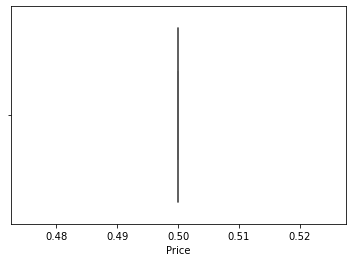

Sales


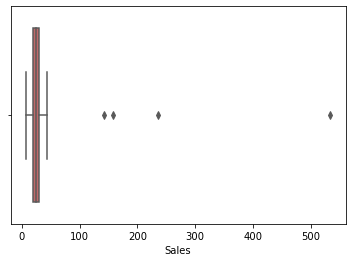

In [25]:
for col in columns:
    sns.boxplot(x=col, data=df, color='indianred')
    print(col)
    plt.show()

In [28]:
df.Price.value_counts()

0.5    365
Name: Price, dtype: int64

Do these lower outliers make sense? Which outliers should be kept?

- I would keep the outliers from rainfall and price but remove the outliers for temp, flyers, and maybe sales

___

c. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?



d. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv.

In [30]:
df = pd.read_csv('lemonade.csv')

In [33]:
def generate_outlier_bounds(df, columns, multiplier=3):
    """
    Takes in a dataframe, the column name, and can specify a multiplier (default=1.5). Returns the upper and lower bounds for the
    values in that column that signify outliers.
    """
    # get q1
    q1 = df[columns].quantile(.25)
    # get q3
    q3 = df[columns].quantile(.75)
    # get iqr
    iqr = q3 - q1

    upper = q3 + (multiplier * iqr)
    lower = q1 - (multiplier * iqr)
    
    upper = pd.DataFrame(upper)
    upper.columns = ['Upper_Bound']
    lower = pd.DataFrame(lower)
    lower.columns = ['Lower_Bound']

    bounds = pd.concat([upper, lower], axis=1)
    bounds

    return upper, lower, bounds

In [34]:
upper, lower, bounds = generate_outlier_bounds(df, columns, multiplier=3)
bounds

,Upper_Bound,Lower_Bound
Temperature,137.70,-16.30
Rainfall,1.69,-0.13
Flyers,103.00,-23.00
Price,0.50,0.50
Sales,60.00,-10.00


In [35]:
upper

,Upper_Bound
Temperature,137.70
Rainfall,1.69
Flyers,103.00
Price,0.50
Sales,60.00


In [36]:
lower

,Lower_Bound
Temperature,-16.30
Rainfall,-0.13
Flyers,-23.00
Price,0.50
Sales,-10.00


Temperature


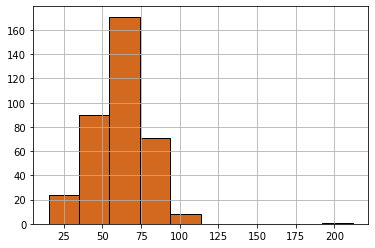

Rainfall


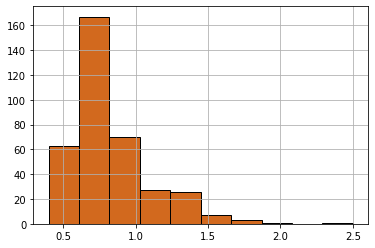

Flyers


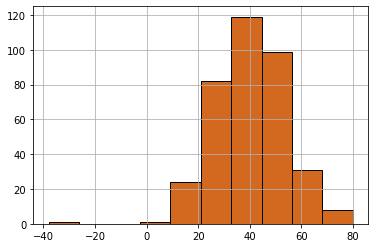

Price


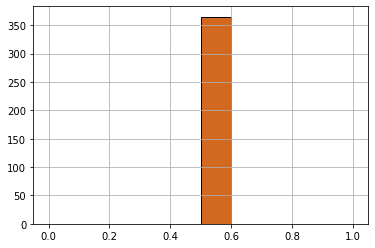

Sales


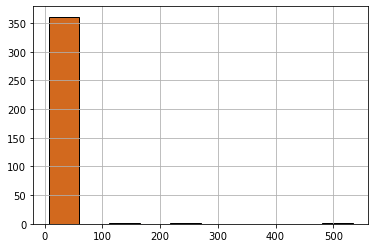

In [37]:
for col in columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist(color='chocolate', edgecolor='black')
        print(col)
        plt.show()

Temperature


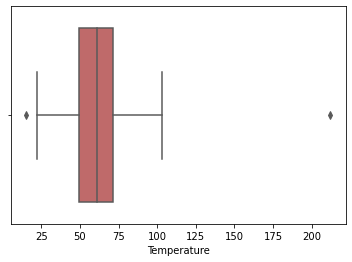

Rainfall


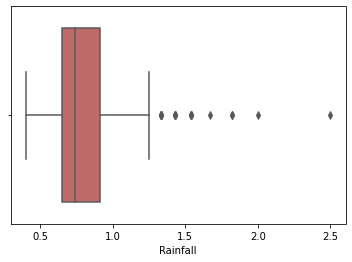

Flyers


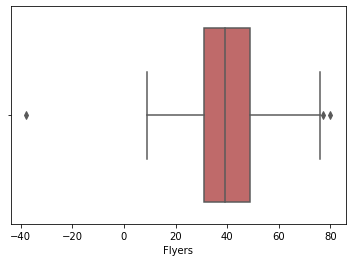

Price


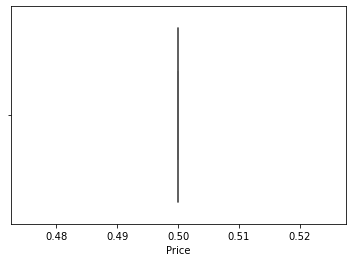

Sales


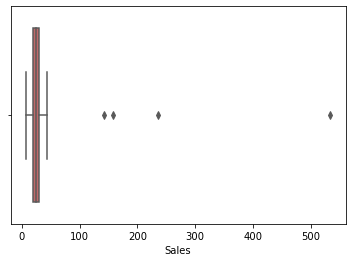

In [38]:
for col in columns:
    sns.boxplot(x=col, data=df, color='indianred')
    print(col)
    plt.show()

- Do these upper outliers make sense? Which outliers should be kept? 
- Do these lower outliers make sense?Which outliers should be kept?

They do make sense.

For upper I would drop:
- Sales
- Rainfall
- Temp

For lower I would drop:
- Flyers

___

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:



In [39]:
df = pd.read_csv('lemonade.csv')

a. Use a 2 sigma decision rule to isolate the outliers.


In [42]:
for col in columns:
    z_scores = pd.Series((df[col] - df[col].mean()) / df[col].std())
    colname = 'z_scores_' + str(col)
    df[colname] = z_scores
    
    print(col)
    print(df[z_scores.abs() >= 2])
    print('____________________________________________________________________________________________')

Temperature
         Date       Day  Temperature  Rainfall  Flyers  Price  Sales  \
41    2/11/17  Saturday        212.0      0.91      35    0.5     21   
166   6/16/17    Friday         99.3      0.47      77    0.5     41   
176   6/26/17    Monday        102.6      0.47      60    0.5     42   
181    7/1/17  Saturday        102.9      0.47      59    0.5    143   
190   7/10/17    Monday         98.0      0.49      66    0.5     40   
198   7/18/17   Tuesday         99.3      0.47      76    0.5     41   
202   7/22/17  Saturday         99.6      0.47      49    0.5     42   
207   7/27/17  Thursday         97.9      0.47      74    0.5     43   
338   12/5/17   Tuesday         22.0      1.82      11    0.5     10   
364  12/31/17    Sunday         15.1      2.50       9    0.5      7   

     z_scores_Temperature  z_scores_Rainfall  z_scores_Flyers  z_scores_Price  \
41               8.336627           0.306792        -0.370227             NaN   
166              2.105251        

b. Do these make sense?


c. Should certain outliers be kept or removed?


d. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv